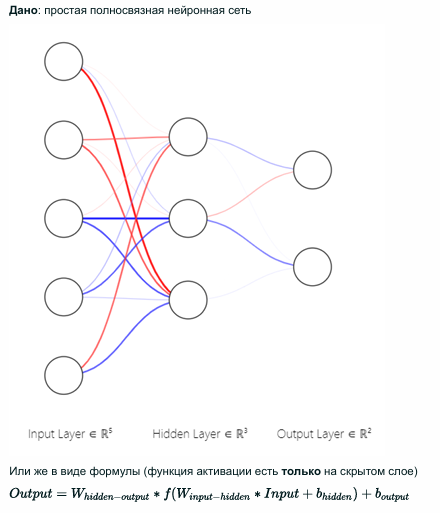

In [2]:
import numpy as np

# Входные данные
Input = np.array([-9.00, -0.40, 3.20, 2.10, -4.00])

# Веса Input -> Hidden
W_input_hidden = np.array([
    [-0.32,  0.05, 0.08],
    [-0.32,  0.29, 0.33],
    [-0.11,  0.07, 0.23],
    [-0.16,  0.22, -0.14],
    [-0.05, -0.01, 0.36]
])

# Смещение Hidden layer
b_hidden = np.array([-0.80, -0.20, 1.20])

# Веса Hidden -> Output
W_hidden_output = np.array([
    [-0.21, 0.25],
    [-0.10, 0.50],
    [-0.26, 0.11]
])

# Смещение Output layer
b_output = np.array([0.40, 1.00])

# Функции активации
def sigmoid(z):   return 1 / (1 + np.exp(-z))
def tanh(z):      return np.tanh(z)
def relu(z):      return np.maximum(0, z)

# Линейная часть скрытого слоя
z_hidden = np.dot(Input, W_input_hidden) + b_hidden

# Применяем активации и считаем выходы:
for act_func, name in zip([sigmoid, tanh, relu], ["Sigmoid", "Tanh", "ReLU"]):
    a_hidden = act_func(z_hidden)
    z_output = np.dot(a_hidden, W_hidden_output) + b_output
    print(f"{name}: {np.round(z_output, 2)}")

Sigmoid: [0.08 1.49]
Tanh: [0.36 1.15]
ReLU: [0.04 1.43]


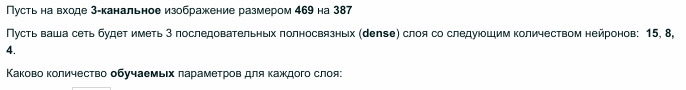

In [21]:
from torchinfo import summary
import torch.nn as nn

model = nn.Sequential()
model.add_module("flatten",nn.Flatten())
model.add_module("hidden layer 1" , nn.Linear(469*387*3, 15))
model.add_module("activation 1" , nn.Sigmoid())
model.add_module("hidden layer 2" , nn.Linear(15, 8))
model.add_module("activation 2" , nn.Sigmoid())
model.add_module("output layer" , nn.Linear(8, 4))

summary(model, input_size = (1,3, 469,387))

Layer (type:depth-idx)                   Output Shape              Param #
Sequential                               [1, 4]                    --
├─Flatten: 1-1                           [1, 544509]               --
├─Linear: 1-2                            [1, 15]                   8,167,650
├─Sigmoid: 1-3                           [1, 15]                   --
├─Linear: 1-4                            [1, 8]                    128
├─Sigmoid: 1-5                           [1, 8]                    --
├─Linear: 1-6                            [1, 4]                    36
Total params: 8,167,814
Trainable params: 8,167,814
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 8.17
Input size (MB): 2.18
Forward/backward pass size (MB): 0.00
Params size (MB): 32.67
Estimated Total Size (MB): 34.85

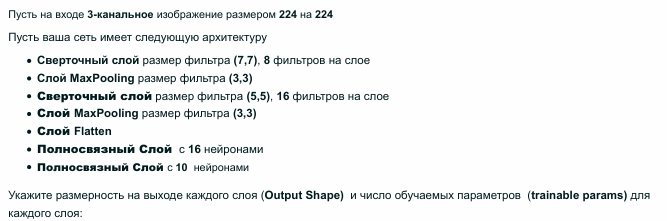

In [22]:
import torch

class SimpleConvNet(nn.Module):
    def __init__(self, input_shape=(3,224,224)):
        super().__init__()
        # Сверточная часть согласно спецификации
        self.features = nn.Sequential(
            nn.Conv2d(3, 8, kernel_size=7, stride=1, padding=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=3),
            nn.Conv2d(8, 16, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=3),
            nn.Flatten()
        )
        # Вычисляем размер flattened вектора программно
        with torch.no_grad():
            dummy = torch.zeros(1, *input_shape)
            flat_size = self.features(dummy).shape[1]
        # Полносвязная часть
        self.classifier = nn.Sequential(
            nn.Linear(flat_size, 16),
            nn.ReLU(),
            nn.Linear(16, 10)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

# Создаём модель и показываем summary для входа 1x3x224x224
model = SimpleConvNet(input_shape=(3,224,224))
summary(model, input_size=(1, 3, 224, 224))

Layer (type:depth-idx)                   Output Shape              Param #
SimpleConvNet                            [1, 10]                   --
├─Sequential: 1-1                        [1, 9216]                 --
│    └─Conv2d: 2-1                       [1, 8, 224, 224]          1,184
│    └─ReLU: 2-2                         [1, 8, 224, 224]          --
│    └─MaxPool2d: 2-3                    [1, 8, 74, 74]            --
│    └─Conv2d: 2-4                       [1, 16, 74, 74]           3,216
│    └─ReLU: 2-5                         [1, 16, 74, 74]           --
│    └─MaxPool2d: 2-6                    [1, 16, 24, 24]           --
│    └─Flatten: 2-7                      [1, 9216]                 --
├─Sequential: 1-2                        [1, 10]                   --
│    └─Linear: 2-8                       [1, 16]                   147,472
│    └─ReLU: 2-9                         [1, 16]                   --
│    └─Linear: 2-10                      [1, 10]                   170
Tot

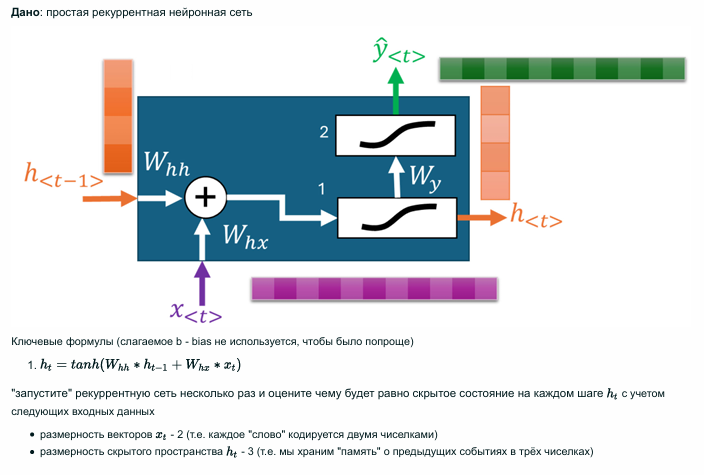

In [32]:
import numpy as np

# Исходные данные
x = np.array([
    [6.10, -10, 3.50],
    [6.70, -6.70, 6.50],
])  # (3, 2)

h0 = np.array([0, 0, 0])  # (3,)

Whh = np.array([
    [-0.11,  0.10,  0.44],
    [-0.17,  0.11,  0.20],
    [-0.29,  0.16, -0.42]
])  # (3, 3)

Whx = np.array([
    [0.05,  0.44],
    [0.06, -0.10],
    [-0.11, 0.41]
])  # (3, 2)

def step(h_prev, x_t):
    return np.tanh(Whh @ h_prev + Whx @ x_t)

# Первый шаг
h1 = step(h0, x.T[0])
h2 = step(h1, x.T[1])
h3 = step(h2, x.T[2])

print("h1 =", np.round(h1, 1))
print("h2 =", np.round(h2, 2))
print("h3 =", np.round(h3, 2))

h1 = [ 1.  -0.3  1. ]
h2 = [-1.    0.06 -0.98]
h3 = [ 0.99 -0.43  0.99]


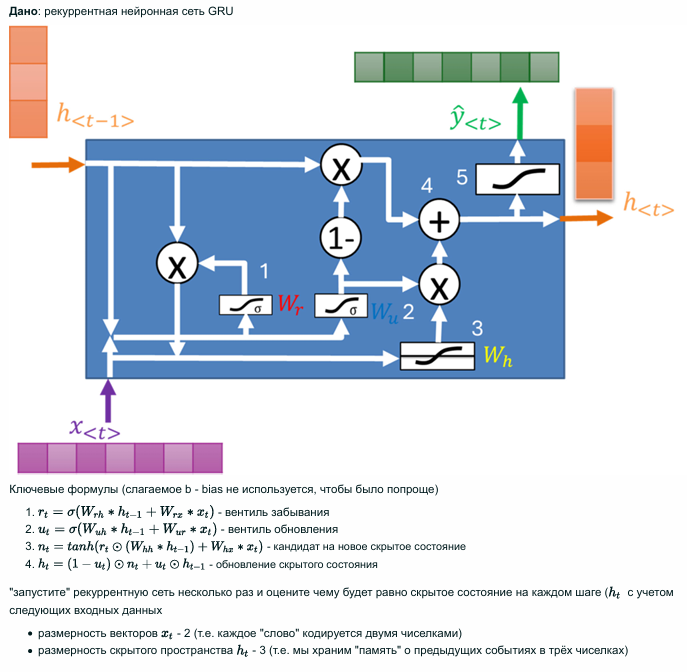

In [45]:
import numpy as np

# Активационные функции
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def tanh(x):
    return np.tanh(x)

# Входные последовательности
x = np.array([
    [-2.30, -4.40],
    [7.00,-2.40],
    [-2.90, 2.20]
])
h0 = np.zeros(3)

# Веса из картинки
Wrh = np.array([
    [-0.14, 0.14, 0.37],
    [-0.01, -0.04, 0.50],
    [0.03, 0.44, 0.16]
])
Wrx = np.array([
    [-0.14, 0.21],
    [-0.16, 0.14],
    [-0.07, 0.43]
])

Wuh = np.array([
    [-0.44, 0.09, -0.19],
    [-0.10, 0.38, 0.33],
    [-0.15, -0.10, 0.22]
])
Wux = np.array([
    [-0.04, 0.40],
    [-0.39, 0.17],
    [-0.19, 0.27]
])

Whh = np.array([
    [0.02, 0.09, 0.13],
    [-0.16, -0.04, -0.07],
    [0.05, 0.10, -0.44]
])
Whx = np.array([
    [0.08, 0.47],
    [-0.43, 0.32],
    [-0.20, 0.49]
])

# Инициализация
h = np.zeros((4, 3)) # h0, h1, h2, h3
h[0] = h0

for t in range(3):
    r_t = sigmoid(h[t] @ Wrh + np.dot(x[t],Wrx.T))
    u_t = sigmoid(h[t] @ Wuh + x[t] @ Wux.T)
    n_t = tanh((r_t * (h[t] @ Whh)) + x[t] @ Whx.T)
    h[t+1] = (1-u_t) * n_t + u_t * h[t]

    print(f"h<{t+1}> = {np.round(h[t+1], 2)}")

# h<1>, h<2>, h<3> выведены на экран

h<1> = [-0.82 -0.18 -0.64]
h<2> = [-0.61 -0.97 -0.95]
h<3> = [-0.37 -0.51 -0.33]


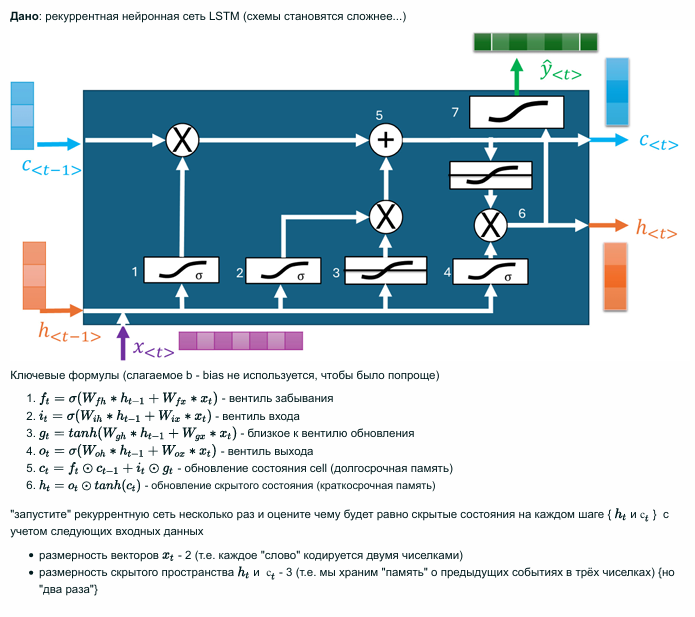

In [55]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

# Входы
x = np.array([
    [-7.90,  1.20],
    [ 9.10, -0.40],
    [-9.60, -4.90]
])

h = np.zeros((4, 3))  # h0, h1, h2, h3
c = np.zeros((4, 3))  # c0, c1, c2, c3

# Wfh, Wfx
Wfh = np.array([
    [-0.09, 0.26, 0.21],
    [-0.07, 0.47, -0.48],
    [-0.01, 0.48, 0.07]
])
Wfx = np.array([
    [-0.10, 0.06],
    [ 0.04, 0.02],
    [-0.34, 0.04]
])

# Wih, Wix
Wih = np.array([
    [-0.44, 0.47, -0.01],
    [-0.09, 0.26, -0.37],
    [ 0.00, 0.10, 0.50]
])
Wix = np.array([
    [-0.47, 0.33],
    [-0.13, 0.27],
    [-0.26, 0.03]
])

# Wgh, Wgx
Wgh = np.array([
    [ 0.10, 0.48, 0.28],
    [-0.24, 0.33, -0.09],
    [-0.11, 0.37, 0.34]
])
Wgx = np.array([
    [-0.33, -0.09],
    [-0.09, -0.10],
    [-0.05, 0.02]
])

# Woh, Wox
Woh = np.array([
    [-0.17, 0.16, 0.01],
    [-0.42, 0.35, -0.19],
    [-0.38, 0.31, -0.17]
])
Wox = np.array([
    [ 0.10, 0.32],
    [-0.45, 0.38],
    [ 0.01, -0.07]
])

for t in range(3):
    h_prev = h[t]
    c_prev = c[t]
    x_t = x[t]

    ft = sigmoid(h_prev @ Wfh + x_t @ Wfx.T)
    it = sigmoid(h_prev @ Wih + x_t @ Wix.T)
    gt = tanh(h_prev @ Wgh + x_t @ Wgx.T)
    ot = sigmoid(h_prev @ Woh + x_t @ Wox.T)
    c[t+1] = ft * c_prev + it * gt
    h[t+1] = ot * tanh(c[t+1])

    print(f"t={t+1}:")
    print(f" f<{t+1}> = {np.round(ft, 4)}")
    print(f" i<{t+1}> = {np.round(it, 4)}")
    print(f" g<{t+1}> = {np.round(gt, 4)}")
    print(f" o<{t+1}> = {np.round(ot, 4)}")
    print(f" c<{t+1}> = {np.round(c[t+1], 2)}")
    print(f" h<{t+1}> = {np.round(h[t+1], 2)}\n")

# h[1], h[2], h[3] и c[1], c[2], c[3] - искомые значения

t=1:
 f<1> = [0.7031 0.4275 0.939 ]
 i<1> = [0.9838 0.7943 0.8899]
 g<1> = [0.9866 0.5306 0.3961]
 o<1> = [0.3999 0.9822 0.4593]
 c<1> = [0.97 0.42 0.35]
 h<1> = [0.3  0.39 0.16]

t=2:
 f<2> = [0.2709 0.6665 0.0383]
 i<2> = [0.0102 0.2625 0.0796]
 g<2> = [-0.9955 -0.4208 -0.3465]
 o<2> = [0.6243 0.0177 0.5053]
 c<2> = [ 0.25  0.17 -0.01]
 h<2> = [ 0.15  0.   -0.01]

t=3:
 f<3> = [0.6575 0.3908 0.9568]
 i<3> = [0.9441 0.4994 0.9124]
 g<3> = [0.9986 0.891  0.3991]
 o<3> = [0.0722 0.9228 0.562 ]
 c<3> = [1.11 0.51 0.35]
 h<3> = [0.06 0.43 0.19]



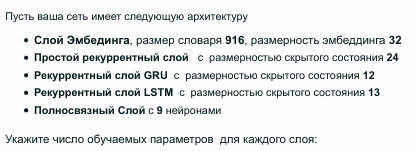

In [62]:
from keras.models import Sequential
from keras.layers import Input, Embedding, SimpleRNN, GRU, LSTM, Dense

model = Sequential()
model.add(Input((None,)))
model.add(Embedding(input_dim=916, output_dim=32))
model.add(SimpleRNN(units=24, return_sequences=True))
model.add(GRU(units=12, return_sequences=True))
model.add(LSTM(units=13))
model.add(Dense(units=9, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)         │ (None, None, 32)       │        29,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_6 (SimpleRNN)        │ (None, None, 24)       │         1,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_6 (GRU)                     │ (None, None, 12)       │         1,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 13)             │         1,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 9)              │           126 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,526 (130.96 KB)

 Trainable params: 33,526 (130.96 KB)

 Non-trainable params: 0 (0.00 B)